# Agenda
* Numpy
* Pandas
* Lab


# Introduction


## Create a new notebook for your code-along:

From our submission directory, type:
    
    jupyter notebook

From the IPython Dashboard, open a new notebook.
Change the title to: "Numpy and Pandas"

# Introduction to Numpy

* Overview
* ndarray
* Indexing and Slicing

More info: [http://wiki.scipy.org/Tentative_NumPy_Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)


## Numpy Overview

* Why Python for Data? Numpy brings *decades* of C math into Python!
* Numpy provides a wrapper for extensive C/C++/Fortran codebases, used for data analysis functionality
* NDAarray allows easy vectorized math and broadcasting (i.e. functions for vector elements of different shapes)

In [1]:
import numpy as np

### Creating ndarrays

An array object represents a multidimensional, homogeneous array of fixed-size items. 

In [2]:
# Creating arrays
a = np.zeros((3))
b = np.ones((2,3))
c = np.random.randint(1,10,(2,3,4))
d = np.arange(0,11,1)

What are these functions?

    arange?

In [6]:
# Note the way each array is printed:
d

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
## Arithmetic in arrays is element wise

In [7]:
a = np.array( [20,30,40,50] )
b = np.arange( 4 )
b

array([0, 1, 2, 3])

In [8]:
c = a-b
c

array([20, 29, 38, 47])

In [9]:
b**2

array([0, 1, 4, 9])

## Indexing, Slicing and Iterating

In [29]:
# one-dimensional arrays work like lists:
a = np.arange(10)**3

In [30]:
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729])

In [34]:
a[2:5]

array([ 8, 27, 64])

In [ ]:
# Multidimensional arrays use tuples with commas for indexing
# with (row,column) conventions beginning, as always in Python, from 0

In [13]:
b = np.random.randint(1,100,(4,4))

In [14]:
b

array([[91, 25, 73, 76],
       [93, 22, 63, 77],
       [92, 65, 82, 35],
       [28, 87, 29,  6]])

In [15]:
# Guess the output
print b[2,3]
print b[0,0] 


35
91


In [35]:
b[0:3,1], b[:,1]

(array([25, 22, 65]), array([25, 22, 65, 87]))

In [ ]:
b[1:3,:]

In [45]:
c = [[9,2,4], 
     [5,43,22], 
     [0,7,6]]
c[2][2]


6

# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o
 

_pandas.pydata.org_

## Pandas Overview

_Source: [pandas.pydata.org](http://pandas.pydata.org/pandas-docs/stable/10min.html)_

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
dates = pd.date_range('20140101',periods=6)
dates

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [115]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
z = pd.DataFrame(index = df.index, columns = df.columns)
df.columns


Index([u'A', u'B', u'C', u'D'], dtype='object')

In [51]:
# Index, columns, underlying numpy data
df.T
df

,A,B,C,D
2014-01-01,-0.646278,1.255013,0.342781,0.931265
2014-01-02,-0.244188,-0.873466,-0.454295,1.265592
2014-01-03,0.533866,1.487887,0.449172,0.862703
2014-01-04,0.549930,-0.692250,-0.049825,-0.342056
2014-01-05,0.548879,0.247649,1.780270,0.837249
2014-01-06,0.799048,0.520878,-2.099711,-1.953307


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d0929d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10d2cc2d0>]], dtype=object)

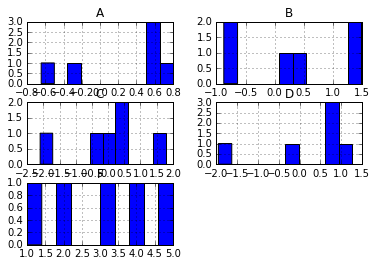

In [86]:
df.hist()

In [52]:
df2 = pd.DataFrame({ 'A' : 1.,
                         'B' : pd.Timestamp('20130102'),
                         'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                         'D' : np.array([3] * 4,dtype='int32'),
                         'E' : 'foo' })
    

df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [53]:
# With specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

#### Viewing Data

In [54]:
df.head()

,A,B,C,D
2014-01-01,-0.646278,1.255013,0.342781,0.931265
2014-01-02,-0.244188,-0.873466,-0.454295,1.265592
2014-01-03,0.533866,1.487887,0.449172,0.862703
2014-01-04,0.549930,-0.692250,-0.049825,-0.342056
2014-01-05,0.548879,0.247649,1.780270,0.837249


In [55]:
df.tail()

,A,B,C,D
2014-01-02,-0.244188,-0.873466,-0.454295,1.265592
2014-01-03,0.533866,1.487887,0.449172,0.862703
2014-01-04,0.549930,-0.692250,-0.049825,-0.342056
2014-01-05,0.548879,0.247649,1.780270,0.837249
2014-01-06,0.799048,0.520878,-2.099711,-1.953307


In [56]:
df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [57]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.256876,0.324285,-0.005268,0.266907
std,0.567199,0.972902,1.273272,1.218129
min,-0.646278,-0.873466,-2.099711,-1.953307
25%,-0.049674,-0.457275,-0.353178,-0.047230
50%,0.541373,0.384264,0.146478,0.849976
75%,0.549667,1.071479,0.422574,0.914124
max,0.799048,1.487887,1.780270,1.265592


In [61]:
df.sort_values(by='B',inplace=True,ascending=False)
df

,A,B,C,D
2014-01-03,0.533866,1.487887,0.449172,0.862703
2014-01-01,-0.646278,1.255013,0.342781,0.931265
2014-01-06,0.799048,0.520878,-2.099711,-1.953307
2014-01-05,0.548879,0.247649,1.780270,0.837249
2014-01-04,0.549930,-0.692250,-0.049825,-0.342056
2014-01-02,-0.244188,-0.873466,-0.454295,1.265592


### Selection

In [62]:
df[['A','B']]

,A,B
2014-01-03,0.533866,1.487887
2014-01-01,-0.646278,1.255013
2014-01-06,0.799048,0.520878
2014-01-05,0.548879,0.247649
2014-01-04,0.549930,-0.692250
2014-01-02,-0.244188,-0.873466


In [63]:
df[0:3]

,A,B,C,D
2014-01-03,0.533866,1.487887,0.449172,0.862703
2014-01-01,-0.646278,1.255013,0.342781,0.931265
2014-01-06,0.799048,0.520878,-2.099711,-1.953307


In [65]:
# By label
# print dates[0]
df.loc[dates[0]]

A   -0.646278
B    1.255013
C    0.342781
D    0.931265
Name: 2014-01-01 00:00:00, dtype: float64

In [66]:
# multi-axis by label
df.loc[:,['A','B']]

,A,B
2014-01-03,0.533866,1.487887
2014-01-01,-0.646278,1.255013
2014-01-06,0.799048,0.520878
2014-01-05,0.548879,0.247649
2014-01-04,0.549930,-0.692250
2014-01-02,-0.244188,-0.873466


In [67]:
# Date Range
df.loc['20140102':'20140104',['B']]

,B
2014-01-03,1.487887
2014-01-04,-0.692250
2014-01-02,-0.873466


In [68]:
# Fast access to scalar
df.at[dates[1],'B']

-0.87346599341681253

In [69]:
# iloc provides integer locations similar to np style
df.iloc[3:]

,A,B,C,D
2014-01-05,0.548879,0.247649,1.780270,0.837249
2014-01-04,0.549930,-0.692250,-0.049825,-0.342056
2014-01-02,-0.244188,-0.873466,-0.454295,1.265592


### Boolean Indexing

In [70]:
df[df.A < 0] # Basically a 'where' operation

,A,B,C,D
2014-01-01,-0.646278,1.255013,0.342781,0.931265
2014-01-02,-0.244188,-0.873466,-0.454295,1.265592


### Setting

In [71]:
df_posA = df.copy() # Without "copy" it would act on the dataset

df_posA[df_posA.A < 0] = -1*df_posA

In [72]:
df_posA

,A,B,C,D
2014-01-03,0.533866,1.487887,0.449172,0.862703
2014-01-01,0.646278,-1.255013,-0.342781,-0.931265
2014-01-06,0.799048,0.520878,-2.099711,-1.953307
2014-01-05,0.548879,0.247649,1.780270,0.837249
2014-01-04,0.549930,-0.692250,-0.049825,-0.342056
2014-01-02,0.244188,0.873466,0.454295,-1.265592


In [73]:
#Setting new column aligns data by index
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20140102',periods=6))

In [75]:
type(s1)

pandas.core.series.Series

In [76]:
s1.columns

AttributeError: 'Series' object has no attribute 'columns'

In [77]:
s1.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-04', '2014-01-05',
               '2014-01-06', '2014-01-07'],
              dtype='datetime64[ns]', freq='D')

In [78]:
df['F'] = s1

In [79]:
df

,A,B,C,D,F
2014-01-03,0.533866,1.487887,0.449172,0.862703,2.0
2014-01-01,-0.646278,1.255013,0.342781,0.931265,NaN
2014-01-06,0.799048,0.520878,-2.099711,-1.953307,5.0
2014-01-05,0.548879,0.247649,1.780270,0.837249,4.0
2014-01-04,0.549930,-0.692250,-0.049825,-0.342056,3.0
2014-01-02,-0.244188,-0.873466,-0.454295,1.265592,1.0


### Missing Data

In [80]:
# Add a column with missing data
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

In [81]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [82]:
df1

,A,B,C,D,F,E
2014-01-01,-0.646278,1.255013,0.342781,0.931265,NaN,1.0
2014-01-02,-0.244188,-0.873466,-0.454295,1.265592,1.0,1.0
2014-01-03,0.533866,1.487887,0.449172,0.862703,2.0,NaN
2014-01-04,0.549930,-0.692250,-0.049825,-0.342056,3.0,NaN


In [83]:
# find where values are null
pd.isnull(df1)

,A,B,C,D,F,E
2014-01-01,False,False,False,False,True,False
2014-01-02,False,False,False,False,False,False
2014-01-03,False,False,False,False,False,True
2014-01-04,False,False,False,False,False,True


### Operations

In [87]:
df.describe()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,A,B,C,D,F
count,6.000000,6.000000,6.000000,6.000000,5.000000
mean,0.256876,0.324285,-0.005268,0.266907,3.000000
std,0.567199,0.972902,1.273272,1.218129,1.581139
min,-0.646278,-0.873466,-2.099711,-1.953307,1.000000
25%,-0.049674,-0.457275,-0.353178,-0.047230,NaN
50%,0.541373,0.384264,0.146478,0.849976,NaN
75%,0.549667,1.071479,0.422574,0.914124,NaN
max,0.799048,1.487887,1.780270,1.265592,5.000000


In [91]:
df

,A,B,C,D,F
2014-01-03,0.533866,1.487887,0.449172,0.862703,2.0
2014-01-01,-0.646278,1.255013,0.342781,0.931265,NaN
2014-01-06,0.799048,0.520878,-2.099711,-1.953307,5.0
2014-01-05,0.548879,0.247649,1.780270,0.837249,4.0
2014-01-04,0.549930,-0.692250,-0.049825,-0.342056,3.0
2014-01-02,-0.244188,-0.873466,-0.454295,1.265592,1.0


In [89]:
df.mean()
df.mean(1) # Operation on two different axes

2014-01-03    1.066726
2014-01-01    0.470695
2014-01-06    0.453382
2014-01-05    1.482809
2014-01-04    0.493160
2014-01-02    0.138729
dtype: float64

### Applying functions

In [92]:
df

,A,B,C,D,F
2014-01-03,0.533866,1.487887,0.449172,0.862703,2.0
2014-01-01,-0.646278,1.255013,0.342781,0.931265,NaN
2014-01-06,0.799048,0.520878,-2.099711,-1.953307,5.0
2014-01-05,0.548879,0.247649,1.780270,0.837249,4.0
2014-01-04,0.549930,-0.692250,-0.049825,-0.342056,3.0
2014-01-02,-0.244188,-0.873466,-0.454295,1.265592,1.0


In [93]:
df.apply(np.cumsum)

,A,B,C,D,F
2014-01-03,0.533866,1.487887,0.449172,0.862703,2.0
2014-01-01,-0.112412,2.742900,0.791953,1.793967,NaN
2014-01-06,0.686637,3.263778,-1.307758,-0.159340,7.0
2014-01-05,1.235516,3.511427,0.472512,0.677909,11.0
2014-01-04,1.785446,2.819177,0.422687,0.335853,14.0
2014-01-02,1.541258,1.945711,-0.031608,1.601445,15.0


In [94]:
df.apply(lambda x: x.max() - x.min())

A    1.445327
B    2.361353
C    3.879982
D    3.218899
F    4.000000
dtype: float64

In [95]:
# Built in string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

In [96]:
np.random.randn(10,4)

array([[ 2.82507106, -0.92868973,  1.35792089, -0.32673759],
       [ 0.22680128, -0.14931228,  0.08264591,  0.13808819],
       [-1.66182796, -0.67158144,  1.01009628, -1.13596861],
       [ 0.0943642 , -1.0112825 , -2.58339422,  1.68536797],
       [ 0.07537169, -0.0367071 , -0.63637456,  0.55563988],
       [ 1.34917372,  2.72923896,  0.74681641, -0.32024288],
       [ 0.16761958, -1.98633108, -0.26246271,  0.23568445],
       [ 0.01395033,  0.95507093,  0.26064037, -0.61594073],
       [ 0.15566496, -1.08551052,  1.61609821, -1.23825215],
       [-0.90149645,  0.05357594,  0.02111928,  0.85308383]])

In [97]:
#Concatenating pandas objects together
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-0.686111,-1.078372,-0.789730,-0.615189
1,1.007095,-0.518136,-0.254590,0.693623
2,0.668900,0.184772,-0.982395,0.484142
3,-0.148345,0.792968,-1.347239,-0.755943
4,-0.605350,-0.195225,1.403462,-1.468278
5,-1.305166,0.862862,-1.369370,-0.853107
6,-1.118426,0.658079,-0.523406,-0.089627
7,-1.059851,1.314658,-0.167862,-0.787207
8,-0.491134,1.639271,-0.041948,-1.037371
9,-0.604064,0.508905,1.393056,0.154876


In [98]:
# Break it into pieces
pieces = [df[:3], df[3:7],df[7:]]
pieces

[          0         1         2         3
 0 -0.686111 -1.078372 -0.789730 -0.615189
 1  1.007095 -0.518136 -0.254590  0.693623
 2  0.668900  0.184772 -0.982395  0.484142,
           0         1         2         3
 3 -0.148345  0.792968 -1.347239 -0.755943
 4 -0.605350 -0.195225  1.403462 -1.468278
 5 -1.305166  0.862862 -1.369370 -0.853107
 6 -1.118426  0.658079 -0.523406 -0.089627,
           0         1         2         3
 7 -1.059851  1.314658 -0.167862 -0.787207
 8 -0.491134  1.639271 -0.041948 -1.037371
 9 -0.604064  0.508905  1.393056  0.154876]

In [99]:
pd.concat(pieces)

,0,1,2,3
0,-0.686111,-1.078372,-0.789730,-0.615189
1,1.007095,-0.518136,-0.254590,0.693623
2,0.668900,0.184772,-0.982395,0.484142
3,-0.148345,0.792968,-1.347239,-0.755943
4,-0.605350,-0.195225,1.403462,-1.468278
5,-1.305166,0.862862,-1.369370,-0.853107
6,-1.118426,0.658079,-0.523406,-0.089627
7,-1.059851,1.314658,-0.167862,-0.787207
8,-0.491134,1.639271,-0.041948,-1.037371
9,-0.604064,0.508905,1.393056,0.154876


In [100]:
# Also can "Join" and "Append"
df

,0,1,2,3
0,-0.686111,-1.078372,-0.789730,-0.615189
1,1.007095,-0.518136,-0.254590,0.693623
2,0.668900,0.184772,-0.982395,0.484142
3,-0.148345,0.792968,-1.347239,-0.755943
4,-0.605350,-0.195225,1.403462,-1.468278
5,-1.305166,0.862862,-1.369370,-0.853107
6,-1.118426,0.658079,-0.523406,-0.089627
7,-1.059851,1.314658,-0.167862,-0.787207
8,-0.491134,1.639271,-0.041948,-1.037371
9,-0.604064,0.508905,1.393056,0.154876


### Grouping


In [101]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})

In [102]:
df

,A,B,C,D
0,foo,one,1.037420,-1.108298
1,bar,one,1.949148,1.673711
2,foo,two,0.263028,1.217545
3,bar,three,-1.258542,0.812507
4,foo,two,1.901648,-0.081162
5,bar,two,-0.560568,-0.350111
6,foo,one,0.416608,0.758198
7,foo,three,0.169466,0.131191


In [103]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.949148  1.673711
    three -1.258542  0.812507
    two   -0.560568 -0.350111
foo one    1.454029 -0.350100
    three  0.169466  0.131191
    two    2.164677  1.136383

### Reshaping

In [ ]:
# You can also stack or unstack levels

In [104]:
a = df.groupby(['A','B']).sum()

In [105]:
# Pivot Tables
pd.pivot_table(df,values=['C','D'],index=['A'],columns=['B'])

C                             D                    
B         one     three       two       one     three       two
A                                                              
bar  1.949148 -1.258542 -0.560568  1.673711  0.812507 -0.350111
foo  0.727014  0.169466  1.082338 -0.175050  0.131191  0.568191

### Time Series


In [ ]:
import pandas as pd
import numpy as np

In [106]:
# 100 Seconds starting on January 1st
rng = pd.date_range('1/1/2014', periods=100, freq='S')

In [107]:
# Give each second a random value
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [108]:
ts

2014-01-01 00:00:00     43
2014-01-01 00:00:01      8
2014-01-01 00:00:02    222
2014-01-01 00:00:03     67
2014-01-01 00:00:04    322
2014-01-01 00:00:05    301
2014-01-01 00:00:06    231
2014-01-01 00:00:07    453
2014-01-01 00:00:08     55
2014-01-01 00:00:09    499
2014-01-01 00:00:10    201
2014-01-01 00:00:11    237
2014-01-01 00:00:12    395
2014-01-01 00:00:13     96
2014-01-01 00:00:14    449
2014-01-01 00:00:15     77
2014-01-01 00:00:16     98
2014-01-01 00:00:17     60
2014-01-01 00:00:18     70
2014-01-01 00:00:19    156
2014-01-01 00:00:20    210
2014-01-01 00:00:21     63
2014-01-01 00:00:22    234
2014-01-01 00:00:23      0
2014-01-01 00:00:24    144
2014-01-01 00:00:25    427
2014-01-01 00:00:26    412
2014-01-01 00:00:27    192
2014-01-01 00:00:28    471
2014-01-01 00:00:29    366
                      ... 
2014-01-01 00:01:10      4
2014-01-01 00:01:11    226
2014-01-01 00:01:12    324
2014-01-01 00:01:13    266
2014-01-01 00:01:14     74
2014-01-01 00:01:15    495
2

In [109]:
# Built in resampling
ts.resample('1Min').mean() # Resample secondly to 1Minutely

2014-01-01 00:00:00    233.55
2014-01-01 00:01:00    222.05
Freq: T, dtype: float64

In [110]:
# Many additional time series features
# ts. #use tab

SyntaxError: invalid syntax (<ipython-input-110-5c9240a56f62>, line 2)

### Plotting


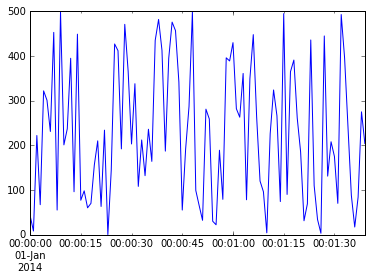

In [111]:
ts.plot()

In [112]:
def randwalk(startdate,points):
    ts = pd.Series(np.random.randn(points), index=pd.date_range(startdate, periods=points))
    ts=ts.cumsum()
    ts.plot()
    return(ts)

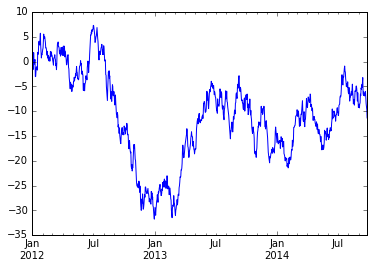

In [113]:
# Using pandas to make a simple random walker by repeatedly running:
a=randwalk('1/1/2012',1000)

In [ ]:
# Pandas plot function will print with labels as default

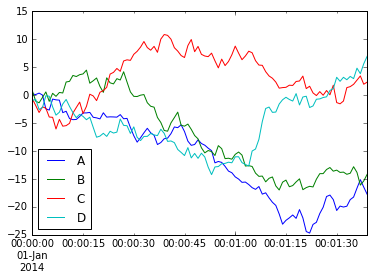

In [114]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure();df.plot();plt.legend(loc='best') #

### I/O
I/O is straightforward with, for example, pd.read_csv or df.to_csv

#### The benefits of open source:

Let's look under x's in plt modules

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/10min.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas